<span style="color:blue"> <b> Description of the project

We build a Monte Carlo simulation of the 2D Ising model with $H=0$.  Using this model, I
was able to compute the expectation values of the absolute value of the
magnetization per spin for systems of $L \times L$ spins, with
$L=4, 8, 16$, and $32$ as a function of temperature. 

It is most convenient to work in dimensionless units.  We will, therefore, compute all energies in units of $J$.  All temperatures will be measured in units of $J/k_B$.  Making the substitutions: $E \rightarrow \tilde{E} J$, $H \rightarrow \tilde{H} J$, with quantities with tildes dimensionless, the dimensionless energy expression becomes:

\begin{equation}
\tilde{E}_{total}=-\sum_{i=0}^{L-1}\sum_{j=0}^{L-1} \left (\sigma_{i,j}
  \sigma_{i,j+1}+\sigma_{i,j} 
  \sigma_{i+1,j} \right )-\tilde{H}\sum_{i=0}^{L-1} \sum_{j=0}^{L-1} \sigma_{i,j}.
\end{equation}

One can also show that the partition function can be written in dimensionless form as:

\begin{equation}
Z=\sum_{\{\sigma_{ij} \} } \exp \left [   \frac{1}{\tilde{T}} \sum_{i=0}^{L-1}\sum_{j=0}^{L-1} \left (\sigma_{i,j}
  \sigma_{i,j+1}+\sigma_{i,j} 
  \sigma_{i+1,j} \right ) +\frac{\tilde{H}}{\tilde{T}} \sum_{i=0}^{L-1} \sum_{j=0}^{L-1} \sigma_{i,j} \right ] ,
\end{equation}

with the sum extending over all spin configurations.  You can then compute the heat capacity per site using the formulae developed in class.

In addition, you should compute the magnetic susceptibility per site, $\chi$,
at each temperature:

\begin{equation}
\chi = \frac{ \left ( \langle M^2 \rangle - \langle M \rangle^2
   \right )  }{L^2 \tilde{T}}.
\end{equation}

Here $M$ is the total magnetization of the system.
You should also compute the heat capacity per site for the model as
well. You should estimate the uncertainty in all of your predictions.

Plot the magnetizations, the susceptibilities and heat capacities,
with the appropriate error bars as a function of temperature, and
compare them to the exact values for the infinite system presented
below.  Discuss the dependence of your results on system size.

Here are the exact solution predictions for the 2-D Ising
model with $H=0$.  (The solution is due to Onsager.) The magnetization per site
is given by

\begin{equation}
\langle m \rangle = \left \{ 1 - \left [\sinh \left ( 2 \beta J \right
    )\right ]^{-4}
\right \}^\frac{1}{8}.
\end{equation}

The critical temperature is defined by:

\begin{equation}
\frac{2 J}{k_B T_c}= \ln \left ( 1+\sqrt{2} \right ).
\end{equation}

Finally, the heat capacity per spin, $C$, is given by

\begin{equation}
C= \frac{2 k_B}{\pi}\left ( \frac{2 J}{k_B T_c} \right )^2 \left [ -\ln \left
    ( 1-\frac{T}{T_c} \right )+ \ln \left ( \frac{k_B T_c}{2 J} \right
  ) - \left (1+\frac{\pi}{4} \right ) \right ].
\end{equation}

Note that the heat capacity diverges at the critical point logarithmically.  This divergence is not seen in a finite sized system.  Note also, that I do not have an analytical solution for the magnetic susceptibility, so you do not have to compare this to the exact result.

## Code:

In [1]:
import numpy as np
from math import exp, sqrt
#from datetime import datetime
import matplotlib.pyplot as plt
import math
from numpy.random import random, rand



def periodic_index(i, L):
    return i%L


def get_random_number_between_0_and_1():
    return np.random.random()
    
    
def init(L):
        state = 2*np.random.randint(2, size=(L,L))-1
        return state
        
def E_dimensionless(config,L):
    total_energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%L, j] + config[i,(j+1)%L] + config[(i-1)%L, j] + config[i,(j-1)%L]
            total_energy += -nb*S
    return (total_energy/4)

def magnetization(config):
    Mag = np.sum(config)
    
    return Mag 


def MC_step(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    L = len(config)
    for i in range(L):
        for j in range(L):
            a = np.random.randint(0, L) # looping over i & j therfore use a & b
            b = np.random.randint(0, L)
            sigma =  config[a, b]
            neighbors = config[(a+1)%L,b] + config[a,(b+1)%L] + config[(a-1)%L,b] + config[a,(b-1)%L]
            del_E = 2*sigma*neighbors
            if del_E < 0:
                sigma *= -1
            elif rand() < np.exp(-del_E*beta):
                sigma *= -1
            config[a, b] = sigma
    return config

    
    
def plot(config, title):
    plt.figure(figsize=[10, 10])
    fig = plt.imshow(config)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.title(title, fontsize=18)
    plt.show()
        
# I did this function to determine the number of steps to reach the equilibrium state        
def plot_energy_ini(config, title, mini_steps,T):
    steps = np.arange(0,mini_steps,1)
    energies = [[] for i in range(mini_steps)]
    for i in range(0, mini_steps):
        for j in range(len(config)**2):
            perturb(config,T)
        energies[i] = E_dimensionless(config)
    plt.plot(steps, energies)
    plt.title(title)
    
    
# this function is to determine the error on a mesure m  
def estimation_error(m): 
    delta_m = 0
    for i in range(len(m)):
        delta_m += (m[i] - sum(m)/len(m))**2
    delta_m = sqrt(delta_m/(len(m)*(len(m)-1)))
    return delta_m
        
        
def calcul_energy_mag_C_X(config, L, eqSteps, err_runs):
        
    # L is the length of the lattice
        
    nt      = 100         #  number of temperature points
    mcSteps = 1000
    
    T_c = 2/math.log(1 + math.sqrt(2))
        
    # the number of MC sweeps for equilibirum should be at leat equal to the number of MC sweeps for equilibirum

    # initialisation of all variables
    T = np.linspace(1., 7., nt); 
    E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
    C_theoric, M_theoric = np.zeros(nt), np.zeros(nt)
    delta_E,delta_M, delta_C, delta_X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
    n1 = 1.0/(mcSteps*L*L)
    n2 = 1.0/(mcSteps*mcSteps*L*L)    # n1 and n2 will be use to compute the mean value and the # by sites
        # of E and E^2
        
    Energies = []
    Magnetizations = []
    SpecificHeats = []
    Susceptibilities = []
    delEnergies = []
    delMagnetizations = []
    delSpecificHeats = []
    delSusceptibilities = []
    
    for t in range(nt):
        # initialize total energy and mag
        beta = 1./T[t]
        # evolve the system to equilibrium
        for i in range(eqSteps):
            MC_step(config, beta)
        # list of ten macroscopic properties
        Ez = [], Cz = [], Mz = [], Xz = [] 

        for j in range(err_runs):
            E = E_squared = M = M_squared = 0
            for i in range(mcSteps):
                MC_step(config, beta)           
                energy = E_dimensionless(config,L) # calculate the energy at time stamp
                mag = abs(magnetization(config)) # calculate the abs total mag. at time stamp

                # sum up total energy and mag after each time steps

                E += energy
                E_squared += energy**2
                M += mag
                M_squared += mag**2


            # mean (divide by total time steps)

            E_mean = E/mcSteps
            E_squared_mean = E_squared/mcSteps
            M_mean = M/mcSteps
            M_squared_mean = M_squared/mcSteps

            # calculate macroscopic properties (divide by # sites) and append

            Energy = E_mean/L**2
            SpecificHeat = beta**2*(E_squared_mean - E_mean**2)/L**2
            Magnetization = M_mean/L**2
            Susceptibility = beta*(M_squared_mean - M_mean**2)/L**2

            Ez.append(Energy); Cz.append(SpecificHeat); Mz.append(Magnetization); Xz.append(Susceptibility);

        Energy = np.mean(Ez)
        Energies.append(Energy)
        delEnergy = np.std(Ez)
        delEnergies.append(float(delEnergy))
        
        Magnetization = np.mean(Mz)
        Magnetizations.append(Magnetization)
        delMagnetization = np.std(Mz)
        delMagnetizations.append(delMagnetization)

        
        SpecificHeat = np.mean(Cz)
        SpecificHeats.append(SpecificHeat)
        delSpecificHeat = np.std(Cz)
        delSpecificHeats.append(delSpecificHeat)

        Susceptibility = np.mean(Xz)
        delSusceptibility = np.std(Xz)        
        Susceptibilities.append(Susceptibility)
        delSusceptibilities.append(delSusceptibility)
        
            
        
        if T[t] - T_c >= 0:
            C_theoric[t] = 0
        else:
            M_theoric[t] = pow(1 - pow(np.sinh(2*beta),-4),1/8)
        
        coeff = math.log(1 + math.sqrt(2))
        if T[t] - T_c >= 0:
            C_theoric[t] = 0
        else: 
            C_theoric[t] = (2.0/np.pi)*(coeff**2)*(-math.log(1-T[t]/T_c) + math.log(1.0/coeff) - (1 + np.pi/4)) 
        
    return (T,Energies,Magnetizations,SpecificHeats,Susceptibilities, delEnergies, delMagnetizations,M_theoric, 
            C_theoric, delSpecificHeats, delSusceptibilities)






In [51]:
config = init(4)
result = calcul_energy_mag_C_X(config, 4, 1000,10)

T_all = result[0]
E_all_4 = result[1]
M_all_4 = result[2]
C_all_4 = result[3]
X_all_4 = result[4]
delta_E_all_4 = result[5]
delta_M_all_4 = result[6]
delta_C_all_4 = result[9]
delta_X_all_4 = result[10]


In [5]:
config = init(8)
result = calcul_energy_mag_C_X(config, 8, 2000,10)

E_all_8 = result[1]
M_all_8 = result[2]
C_all_8 = result[3]
X_all_8 = result[4]
delta_E_all_8 = result[5]
delta_M_all_8 = result[6]
delta_C_all_8 = result[9]
delta_X_all_8 = result[10]

In [19]:
config = init(16)
result = calcul_energy_mag_C_X(config, 16, 4000,10)

E_all_16 = result[1]
M_all_16 = result[2]
C_all_16 = result[3]
X_all_16 = result[4]
delta_E_all_16 = result[5]
delta_M_all_16 = result[6]
delta_C_all_16 = result[9]
delta_X_all_16 = result[10]

In [52]:
T_all = result[0]
M_theo_all = result[7]
C_theo_all = result[8]

In [ ]:
config = init(32)
result = calcul_energy_mag_C_X(config, 32, 10000,10)

E_all_32 = result[1]
M_all_32 = result[2]
C_all_32 = result[3]
X_all_32 = result[4]
delta_E_all_32 = result[5]
delta_M_all_32 = result[6]
delta_C_all_32 = result[9]
delta_X_all_32 = result[10]

#### 1.First, we plot the Energy, magnetization, heat capacity and susceptibility as functions of temperature for a cell of size 4x4 with the errors on each of the material properties

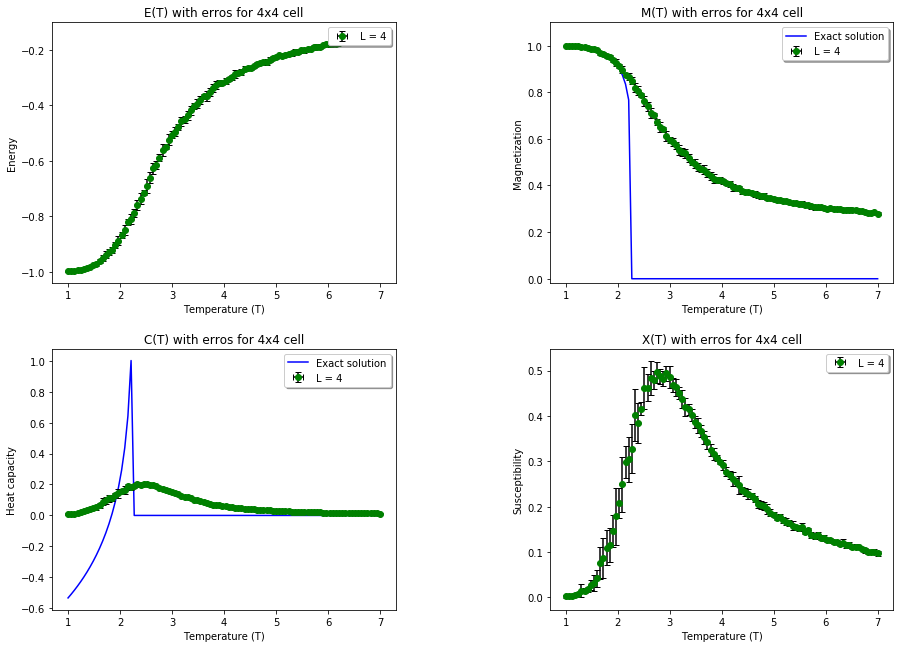

In [85]:
f = plt.figure(figsize=(30, 8));

sp =  f.add_subplot(2, 4, 1);


xerr = [0.0]*len(T_all)
plt.errorbar(T_all, E_all_4, xerr = xerr, yerr = delta_E_all_4 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Energy", fontsize=10);   plt.axis('tight');
plt.title ('E(T) with erros for 4x4 cell')    
plt.legend(loc='upper right', shadow=True, prop={'size': 10})    

# we plot the magnetization for different size of the system


sp =  f.add_subplot(2, 4, 2);
xerr = [0.0]*len(T_all)

plt.errorbar(T_all, M_all_4, xerr = xerr, yerr = delta_M_all_4 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Magnetization", fontsize=10);   plt.axis('tight');
plt.title ('M(T) with erros for 4x4 cell') 
plt.plot(T_all,abs(M_theo_all),c = 'blue' ,label = 'Exact solution')
plt.ylim(-0.02, 1.1)
plt.legend(loc='upper right', shadow=True, prop={'size': 10})


# we plot the heat capacity for different size of the system

sp =  f.add_subplot(2, 4, 5);
plt.plot(T_all,C_theo_all,c = 'blue', label = 'Exact solution') 
xerr = [0.0]*len(T_all)
plt.errorbar(T_all, C_all_4, xerr = xerr, yerr = delta_C_all_4 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Heat capacity", fontsize=10);   plt.axis('tight');
plt.title ('C(T) with erros for 4x4 cell')        
plt.legend(loc='upper right', shadow=True, prop={'size': 10})



# we plot the susceptibility for different size of the system



sp =  f.add_subplot(2, 4, 6); 
xerr = [0.0]*len(T_all)
plt.errorbar(T_all, X_all_4, xerr = xerr, yerr = delta_X_all_4 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Susceptibility", fontsize=10);   plt.axis('tight');
plt.title ('X(T) with erros for 4x4 cell') 
plt.legend(loc='upper right', shadow=True, prop={'size': 10})
plt.subplots_adjust(top=1.1, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.45)

###   

#### 2. Now we plot the Energy, magnetization, heat capacity and susceptibility as functions of temperature for a cell of size 8x8 with the errors on each of the material properties

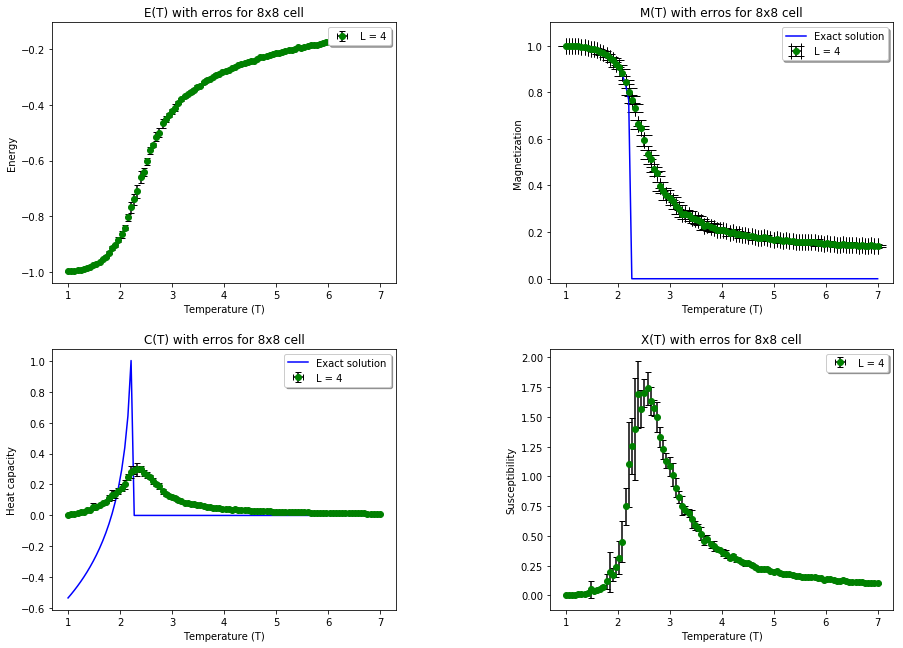

In [86]:
f = plt.figure(figsize=(30, 8));

sp =  f.add_subplot(2, 4, 1);


xerr = [0.0]*len(T_all)
plt.errorbar(T_all, E_all_8, xerr = xerr, yerr = delta_E_all_8 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Energy", fontsize=10);   plt.axis('tight');
plt.title ('E(T) with erros for 8x8 cell')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})    

# we plot the magnetization for different size of the system


sp =  f.add_subplot(2, 4, 2);
xerr = [0.0]*len(T_all)

plt.errorbar(T_all, M_all_8, xerr = xerr, yerr = delta_M_all_4 , capsize=8,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Magnetization", fontsize=10);   plt.axis('tight');
plt.plot(T_all,abs(M_theo_all),c = 'blue' ,label = 'Exact solution')
plt.ylim(-0.02, 1.1)
plt.title ('M(T) with erros for 8x8 cell')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})


# we plot the heat capacity for different size of the system

sp =  f.add_subplot(2, 4, 5);
plt.plot(T_all,C_theo_all,c = 'blue', label = 'Exact solution') 

xerr = [0.0]*len(T_all)
plt.errorbar(T_all, C_all_8, xerr = xerr, yerr = delta_C_all_8 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Heat capacity", fontsize=10);   plt.axis('tight');
plt.title ('C(T) with erros for 8x8 cell')        
plt.legend(loc='upper right', shadow=True, prop={'size': 10})



# we plot the susceptibility for different size of the system



sp =  f.add_subplot(2, 4, 6); 
xerr = [0.0]*len(T_all)
plt.errorbar(T_all, X_all_8, xerr = xerr, yerr = delta_X_all_8 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Susceptibility", fontsize=10);   plt.axis('tight');
plt.title ('X(T) with erros for 8x8 cell')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})
plt.subplots_adjust(top=1.1, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.45)

###   

#### 3. Now we plot the Energy, magnetization, heat capacity and susceptibility as functions of temperature for a cell of size 16x16 with the errors on each of the material properties

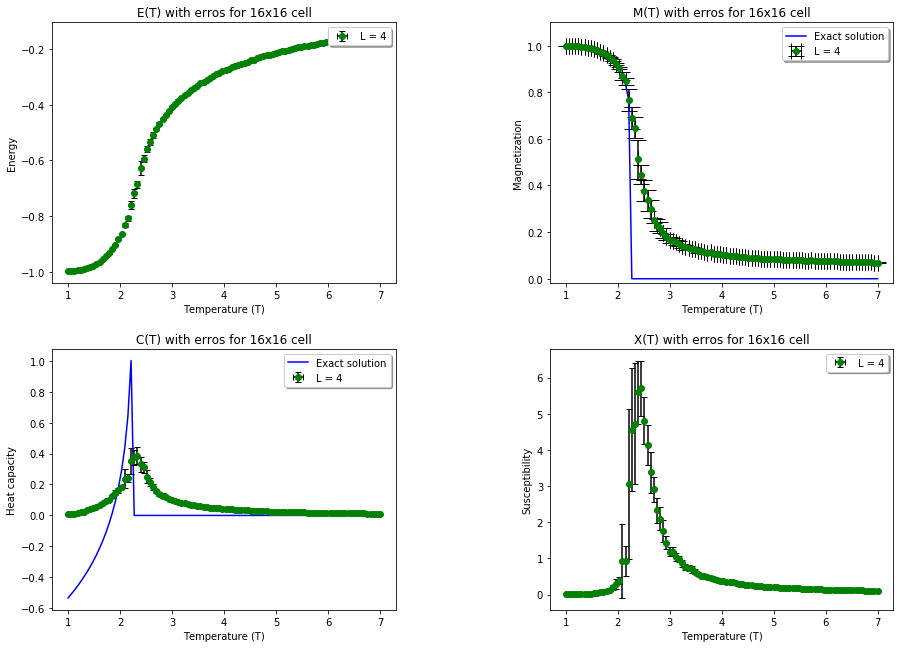

In [87]:
f = plt.figure(figsize=(30, 8));

sp =  f.add_subplot(2, 4, 1);


xerr = [0.0]*len(T_all)
plt.errorbar(T_all, E_all_16, xerr = xerr, yerr = delta_E_all_16 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Energy", fontsize=10);   plt.axis('tight');
plt.title ('E(T) with erros for 16x16 cell')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})    

# we plot the magnetization for different size of the system


sp =  f.add_subplot(2, 4, 2);
xerr = [0.0]*len(T_all)

plt.errorbar(T_all, M_all_16, xerr = xerr, yerr = delta_M_all_16 , capsize=8,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Magnetization", fontsize=10);   plt.axis('tight');
plt.plot(T_all,abs(M_theo_all),c = 'blue' ,label = 'Exact solution')
plt.ylim(-0.02, 1.1)
plt.title ('M(T) with erros for 16x16 cell')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})


# we plot the heat capacity for different size of the system

sp =  f.add_subplot(2, 4, 5);
plt.plot(T_all,C_theo_all,c = 'blue', label = 'Exact solution') 

xerr = [0.0]*len(T_all)
plt.errorbar(T_all, C_all_16, xerr = xerr, yerr = delta_C_all_16 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Heat capacity", fontsize=10);   plt.axis('tight');
plt.title ('C(T) with erros for 16x16 cell')        
plt.legend(loc='upper right', shadow=True, prop={'size': 10})



# we plot the susceptibility for different size of the system



sp =  f.add_subplot(2, 4, 6); 
xerr = [0.0]*len(T_all)
plt.errorbar(T_all, X_all_16, xerr = xerr, yerr = delta_X_all_16 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(4))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Susceptibility", fontsize=10);   plt.axis('tight');
plt.title ('X(T) with erros for 16x16 cell')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})
plt.subplots_adjust(top=1.1, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.45)

###   

#### 4. Now we plot the Energy, magnetization, heat capacity and susceptibility as functions of temperature for a cell of size 32x32 with the errors on each of the material properties

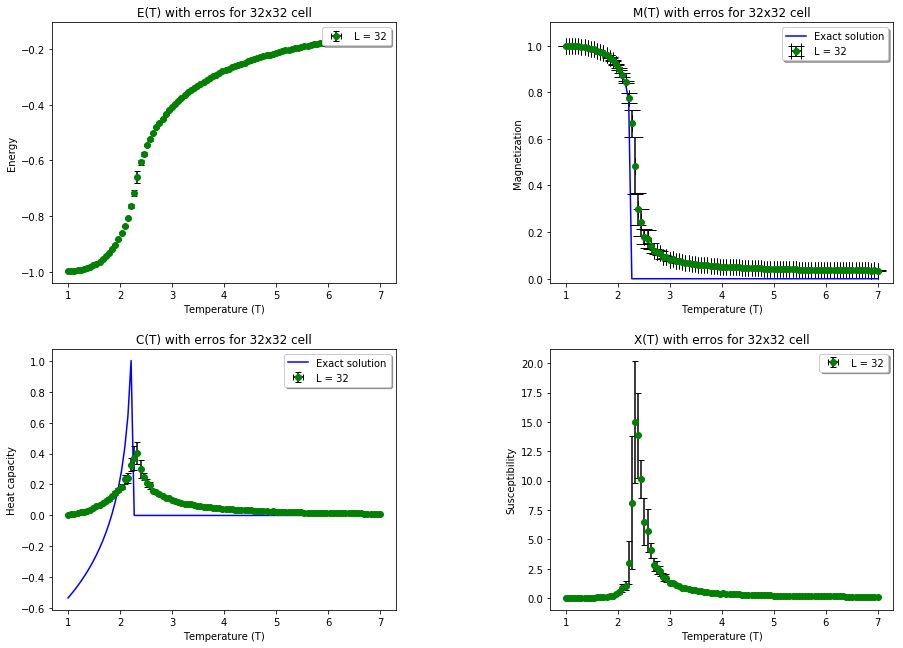

In [18]:
f = plt.figure(figsize=(30, 8));

sp =  f.add_subplot(2, 4, 1);


xerr = [0.0]*len(T_all)
plt.errorbar(T_all, E_all_32, xerr = xerr, yerr = delta_E_all_32 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(32))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Energy", fontsize=10);   plt.axis('tight');
plt.title ('E(T) with erros for 32x32 cell')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})    

# we plot the magnetization for different size of the system


sp =  f.add_subplot(2, 4, 2);
xerr = [0.0]*len(T_all)

plt.errorbar(T_all, M_all_32, xerr = xerr, yerr = delta_M_all_32 , capsize=8,ecolor='black',fmt = 'go', label = 'L = ' + str(32))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Magnetization", fontsize=10);   plt.axis('tight');
plt.plot(T_all,abs(M_theo_all),c = 'blue' ,label = 'Exact solution')
plt.ylim(-0.02, 1.1)
plt.title ('M(T) with erros for 32x32 cell')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})


# we plot the heat capacity for different size of the system

sp =  f.add_subplot(2, 4, 5);
plt.plot(T_all,C_theo_all,c = 'blue', label = 'Exact solution') 

xerr = [0.0]*len(T_all)
plt.errorbar(T_all, C_all_32, xerr = xerr, yerr = delta_C_all_32 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(32))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Heat capacity", fontsize=10);   plt.axis('tight');
plt.title ('C(T) with erros for 32x32 cell')        
plt.legend(loc='upper right', shadow=True, prop={'size': 10})



# we plot the susceptibility for different size of the system



sp =  f.add_subplot(2, 4, 6); 
xerr = [0.0]*len(T_all)
plt.errorbar(T_all, X_all_32, xerr = xerr, yerr = delta_X_all_32 , capsize=3,ecolor='black',fmt = 'go', label = 'L = ' + str(32))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Susceptibility", fontsize=10);   plt.axis('tight');
plt.title ('X(T) with erros for 32x32 cell')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})
plt.subplots_adjust(top=1.1, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.45)

###   

## 4. Gathering the results. 

####  a. We plot the Energy, magnetization, heat capacity and susceptibility as functions of temperature for different cell sizes without the errors on each of the material properties

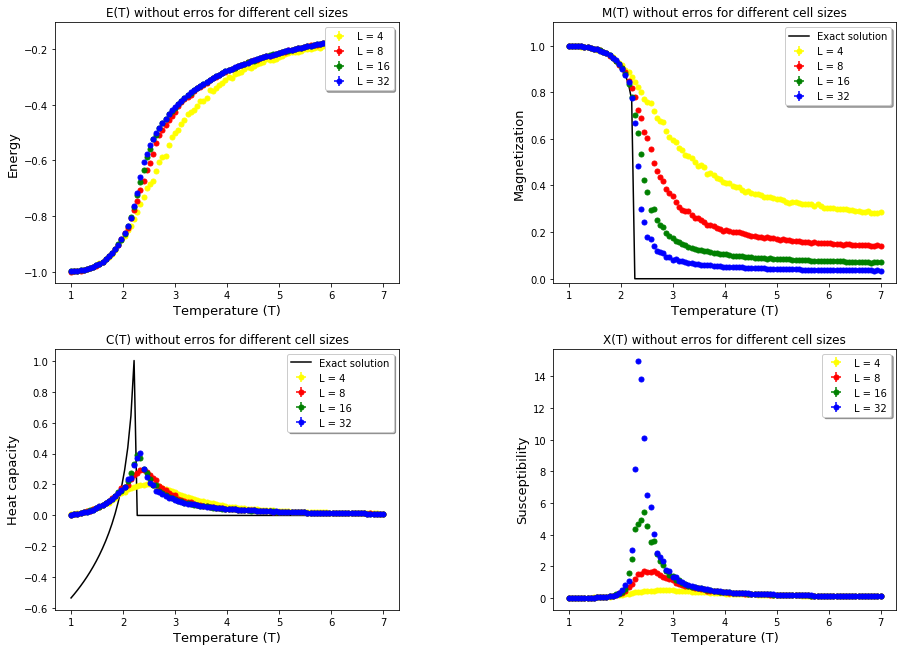

In [32]:
f = plt.figure(figsize=(30, 8));

sp =  f.add_subplot(2, 4, 1);

xerr = [0.0]*len(T_all)
yerr = [0.0]*len(T_all)
plt.errorbar(T_all, E_all_4, xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'yellow', label = 'L = ' + str(4))
plt.errorbar(T_all, E_all_8, xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'red', label = 'L = ' + str(8))
plt.errorbar(T_all, E_all_16, xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'green', label = 'L = ' + str(16))
plt.errorbar(T_all, E_all_32, xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'blue', label = 'L = ' + str(32))
plt.xlabel("Temperature (T)", fontsize=13); 
plt.ylabel("Energy", fontsize=13);   plt.axis('tight');

plt.title ('E(T) without erros for different cell sizes')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})    

# we plot the magnetization for different size of the system

sp =  f.add_subplot(2, 4, 2);

xerr = [0.0]*len(T_all)
yerr = [0.0]*len(T_all)
plt.errorbar(T_all, M_all_4,xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'yellow',label = 'L = ' + str(4))
plt.errorbar(T_all, M_all_8,xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'red',label = 'L = ' + str(8))
plt.errorbar(T_all, M_all_16, xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'green', label = 'L = ' + str(16))
plt.errorbar(T_all, M_all_32, xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'blue', label = 'L = ' + str(32))
plt.xlabel("Temperature (T)", fontsize=13); 
plt.ylabel("Magnetization", fontsize=13);   plt.axis('tight');

plt.plot(T_all,abs(M_theo_all),c = 'black', label = 'Exact solution')
plt.ylim(-0.02, 1.1)
plt.title ('M(T) without erros for different cell sizes')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})


# we plot the heat capacity for different size of the system

sp =  f.add_subplot(2, 4, 5);
plt.plot(T_all,C_theo_all,c = 'black', label = 'Exact solution') 

xerr = [0.0]*len(T_all)
yerr = [0.0]*len(T_all)
plt.errorbar(T_all, C_all_4,xerr = xerr,yerr = yerr,fmt='o' ,markersize=5,c = 'yellow', label = 'L = ' + str(4))
plt.errorbar(T_all, C_all_8,xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'red', label = 'L = ' + str(8))
plt.errorbar(T_all, C_all_16, xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'green', label = 'L = ' + str(16))
plt.errorbar(T_all, C_all_32, xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'blue', label = 'L = ' + str(32))
plt.xlabel("Temperature (T)", fontsize=13); 
plt.ylabel("Heat capacity", fontsize=13);   plt.axis('tight');
plt.title ('C(T) without erros for different cell sizes')

plt.legend(loc='upper right', shadow=True, prop={'size': 10})



# we plot the susceptibility for different size of the system


sp =  f.add_subplot(2, 4, 6); 

xerr = [0.0]*len(T_all)
yerr = [0.0]*len(T_all)
plt.errorbar(T_all, X_all_4,xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'yellow' ,label = 'L = ' + str(4))
plt.errorbar(T_all, X_all_8,xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'red', label = 'L = ' + str(8))
plt.errorbar(T_all, X_all_16, xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'green', label = 'L = ' + str(16))
plt.errorbar(T_all, X_all_32, xerr = xerr,yerr = yerr, fmt='o' ,markersize=5,c = 'blue', label = 'L = ' + str(32))
plt.xlabel("Temperature (T)", fontsize=13); 
plt.ylabel("Susceptibility", fontsize=13);   plt.axis('tight');
plt.title ('X(T) without erros for different cell sizes')

plt.legend(loc='upper right', shadow=True, prop={'size': 10})
plt.subplots_adjust(top=1.10, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.45)

###   


#### b. Now we plot the Energy, magnetization, heat capacity and susceptibility as functions of temperature for different cell sizes but with the errors on each of the material properties

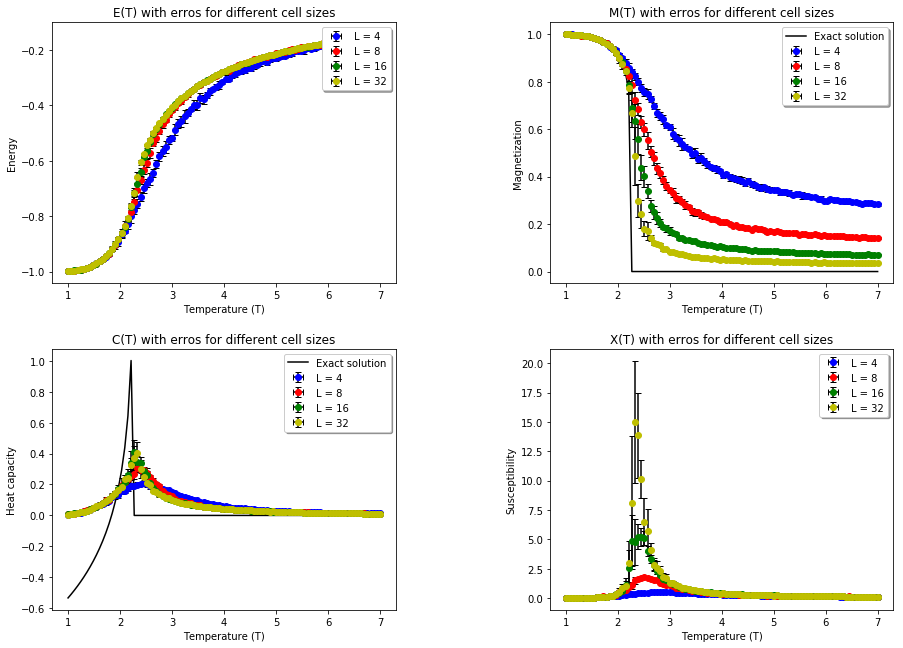

In [66]:
f = plt.figure(figsize=(30, 8));

sp =  f.add_subplot(2, 4, 1);

xerr = [0.0]*len(T_all)
plt.errorbar(T_all, E_all_4, xerr = xerr, yerr = delta_E_all_4 , capsize=3,ecolor='black',fmt = 'bo', label = 'L = ' + str(4))
plt.errorbar(T_all, E_all_8, xerr = xerr, yerr = delta_E_all_8,capsize=3,ecolor='black', fmt = 'ro', label = 'L = ' + str(8))
plt.errorbar(T_all, E_all_16, xerr = xerr, yerr = delta_E_all_16,capsize=3,ecolor='black', fmt = 'go', label = 'L = ' + str(16))
plt.errorbar(T_all, E_all_32, xerr = xerr, yerr = delta_E_all_32,capsize=3,ecolor='black', fmt = 'yo', label = 'L = ' + str(32))

plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Energy", fontsize=10);
plt.title ('E(T) with erros for different cell sizes')
    
plt.legend(loc='upper right', shadow=True, prop={'size': 10})    

# we plot the magnetization for different size of the system

sp =  f.add_subplot(2, 4, 2);

xerr = [0.0]*len(T_all)
plt.errorbar(T_all, M_all_4, xerr = xerr, yerr = delta_M_all_4,capsize=3,ecolor='black',fmt= 'bo',label = 'L = ' + str(4))
plt.errorbar(T_all, M_all_8, xerr = xerr, yerr = delta_M_all_8,capsize=3,ecolor='black',fmt = 'ro',label = 'L = ' + str(8))
plt.errorbar(T_all, M_all_16, xerr = xerr, yerr = delta_M_all_16,capsize=3,ecolor='black', fmt = 'go', label = 'L = ' + str(16))
plt.errorbar(T_all, M_all_32, xerr = xerr, yerr = delta_M_all_32,capsize=3,ecolor='black', fmt = 'yo', label = 'L = ' + str(32))

plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Magnetization", fontsize=10);   

plt.plot(T_all,abs(M_theo_all),c = 'black', label = 'Exact solution')
plt.title ('M(T) with erros for different cell sizes')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})


# we plot the heat capacity for different size of the system

sp =  f.add_subplot(2, 4, 5);
plt.plot(T_all,C_theo_all,c = 'black', label = 'Exact solution') 


xerr = [0.0]*len(T_all)
plt.errorbar(T_all, C_all_4, xerr = xerr, yerr = delta_C_all_4,capsize=3,ecolor='black',fmt = 'bo', label = 'L = ' + str(4))
plt.errorbar(T_all, C_all_8, xerr = xerr, yerr = delta_C_all_8,capsize=3,ecolor='black',fmt = 'ro', label = 'L = ' + str(8))
plt.errorbar(T_all, C_all_16, xerr = xerr, yerr = delta_C_all_16,capsize=3,ecolor='black', fmt = 'go', label = 'L = ' + str(16))
plt.errorbar(T_all, C_all_32, xerr = xerr, yerr = delta_C_all_32,capsize=3,ecolor='black', fmt = 'yo', label = 'L = ' + str(32))

plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Heat capacity", fontsize=10); 
        
plt.title ('C(T) with erros for different cell sizes')
plt.legend(loc='upper right', shadow=True, prop={'size': 10})



# we plot the susceptibility for different size of the system


sp =  f.add_subplot(2, 4, 6); 

xerr = [0.0]*len(T_all)
plt.errorbar(T_all, X_all_4, xerr = xerr, yerr = delta_X_all_4,capsize=3,ecolor='black', fmt = 'bo' ,label = 'L = ' + str(4))
plt.errorbar(T_all, X_all_8, xerr = xerr, yerr = delta_X_all_8,capsize=3, ecolor='black',fmt = 'ro', label = 'L = ' + str(8))
plt.errorbar(T_all, X_all_16, xerr = xerr, yerr = delta_X_all_16,capsize=3, ecolor='black',fmt = 'go', label = 'L = ' + str(16))
plt.errorbar(T_all, X_all_32, xerr = xerr, yerr = delta_X_all_32,capsize=3,ecolor='black', fmt = 'yo', label = 'L = ' + str(32))
plt.xlabel("Temperature (T)", fontsize=10); 
plt.ylabel("Susceptibility", fontsize=10);  
plt.title ('X(T) with erros for different cell sizes')

plt.legend(loc='upper right', shadow=True, prop={'size': 10})

plt.subplots_adjust(top=1.1, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.45)

## Comments 
 

The simulations will be used to illustrate the finite size scaling concepts. Thanks to the known exact results for $ T_{c} $ and the critical exponents, we can check whether the simulation results for large system sizes indeed converge to the thermodynamic limit behavior. 
The most fundamental concept underlying the theory of critical phenomena is that of a correlation
length, which is a measure of a typical length-scale of a system. The correlation length can be
defined in terms of the correlation function, which in the case of the Ising model is given by
the following equation. The correlation function decays exponentially at long distances, and is given by the so-called Ornstein-Zernicke form : 
$$ C(\vec{r}) = \frac{e^{\frac{-r}{\xi}}}{r^{\frac{d-2}{2}}} \label{first}$$
where $\xi $ is the correlation length. This expression is valid only when $ r >> \xi $. The correlation length $\xi$ corresponds to the typical size of the ordered domains in the system. 
In the Ising model above $ T_{c} $ there are on average equal numbers of ordered domains with spin up and down (the material has lost all, and their typical size corresponds to the correlation length. Below Tc the correlation length corresponds to the typical size of domains of spins in an ordered background of oppositely directed spins. 

As a critical point (continuous phase transition) is approached, the correlation length diverges, in the thermodynamic limit, according to a power-law : $ \xi \sim t^{-\nu} $ where t is the reduced temperature measuring the distance from the critical point : $ t = \frac{|T - T_{c}|}{T_{c}} $ and $\nu$ is an example of a critical exponent. 
Another important critical exponent is the one determining the onset of order at the critical point, the magnetization. The order parameter is zero above $T_{c}$ , and below $T_{c}$ it emerges as : 
$$ <m> = (T_{c} - T)^{\beta} $$
For the heat capacity the relation is given by the following formula: 
$$ C = t^{-\alpha} $$ The heat capacity presents a singularity as T approches to $T_{c}$.
For the susceptibility, the relation is the following: 
$$ \chi = t^{-\gamma} $$ It seems that $\chi$ presents a singularity as T approches to $T_{c}$ . Hence, the system becomes infinitely sensitive to a magnetic field h as T approches to $T_{c}$. 

The set of exponents $\nu, \alpha, \beta, \gamma $ for different systems fall into universality classes. Systems
belonging to the same universality class have the same exponents. The universality class does not depend on microscopic details related to the system constituents and their interactions (as long as the interactions are short-ranged; long-range interactions can change the universality class), only on the dimensionality of the system and the
nature of the order parameter. Hence, in our cases, the dimensionality of the system is L, which is why the profil of magnetization, heat capacity and susceptibility as function of temperature, differs from one another as the system size changes. 
The basis of finite-size scaling is that deviations from the infinite-size critical behavior occurs when the correlation length $\chi$  becomes comparable with the system length L. The way these finite-size deviations affects other quantities can be studied by expressing their temperature dependencies using the correlation length as the variable. 
Thus, 
$$ t \sim \xi^\frac{-1}{\nu} $$ 

For example, in the asymptotic power-law form of the magnetization, $$ <m> = T_{c}^{\beta}t^{\beta} = T_{c}^{\beta}\xi^\frac{-\beta}{\nu} $$ Hence, the maximum value of the magnetization for a given system size L should be $$ <m> = T_{c}^{\beta}L^\frac{-\beta}{\nu} $$ Hence, the convergence of the magnetization toward zero depends on the dimension size of the system. In the 2D Ising model, we also have $\frac{\beta}{\nu} = \frac{1}{8} $


Based on the following expression $ \chi = t^{-\gamma} $, in the asymptotic power-law form of the susceptibility, the substitution of t gives $$ \chi = \xi^{\frac{\gamma}{\nu}} $$  Hence, the maximum value of the susceptibility for a given system size L should be $$ \chi = L^{\frac{\gamma}{\nu}} $$ With this expression we can see that the peak value of $\chi$ grows very rapidly with L and explains the difference of profil in the susceptibility plot of the different system sizes. For the 2D Ising model, we have $\frac{\gamma}{\nu} = \frac{7}{4}$ 

Regarding the heat capacity, the relation is quite similar and it is the following one: 
$$ C = \xi^{\frac{\alpha}{\nu}} $$ and the maximum value of the heat capacity for a given system size L should be 
$$ C = L^{\frac{\alpha}{\nu}} $$ Thus as for the magnetic susceptibility, the peak value of C grows very rapidly with L and explains the difference of profil in the heat capacity plot of the different system sizes.



From a more qualitative point of view, we notice that there is an inflexion point for $ T = T_{c} $ for the energy profil but also that the magnetization, the heat capacity and the susceptibility fall down to zeron from this temperature. This means a shift in the behavior of the system, which agrees with the definition of the critical temperature. In fact, the critical temperature is the Curie temperature in our case, and the Curie temperature is the temperature above which the material loses all its permanent magnetic properties, announcing a shift in the behavior of the material. The permanent magnetic properties are caused by the alignment of magnetic moments. Hence, above $ T_{c} $, there are on average equal numbersof ordered domains with spin up and down which can be illustrated by the convergence of magnetic momentum, specific heat and susceptibility toward zero.

Thus, the relation between the precision of the results and the size of the system depends on the propriety we look into. But the more the system size, the more the computational cost increases. Thus, as the time cost is really important, we need to think about the trade-off : time-cost/precision. This is why I wondered the dependance of each propriety on the system size. What I figured out is for energy, we can run our simulation with the smallest system size and the result will be exploitable. It is no longer true for the others propreties. 
For the other propreties, the bigger is the system size, the more accurate are the results. Nevertheless, we can still improve our results by increasing the numer of steps necesseray the reach the equilibrium for the system size 32x32. But as the algorithm ran during 2 days to print the results for Nsteps_equilibriul = 5000, I didn't increase it. 

### seeing forward ... 
From a computation person point of view, optimize the algorithm should be as important as the simulation itself because for the moment the calculus power of computers does not allowed to run complex programs very fast. I think we are all looking forward to work on quantum computers to bend this problem! 